In [2]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

# filenames = glob('*.xml')
# filenames = str(filenames.sort())

filenames = [
    'p38_Bos_conc020180823_110129.xml',
    'p38_Bos_conc120180823_113047.xml',
    'p38_Bos_conc220180823_115951.xml',
    'p38_Bos_conc320180823_122855.xml',
    'p38_Bos_conc420180823_125800.xml',
    'p38_Bos_conc520180823_132708.xml',
    'p38_Bos_conc620180823_135617.xml',
    'p38_Bos_conc720180823_142528.xml',
    'p38_Bos_conc820180823_145513.xml',
    'p38_Bos_conc920180823_152426.xml',
    'p38_Bos_conc1020180823_155337.xml',
    'p38_Bos_conc1120180823_162247.xml',
    'p38_Bos_conc1220180823_165155.xml',
    'p38_Bos_conc1320180823_172108.xml',
    'p38_Bos_conc1420180823_175019.xml',
    'p38_Bos_conc1520180823_181931.xml',
    'p38_Bos_conc1620180823_184842.xml'
]

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)


# In[18]:


plate_layout = pd.read_excel('20180823_Kinase_dispensing_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


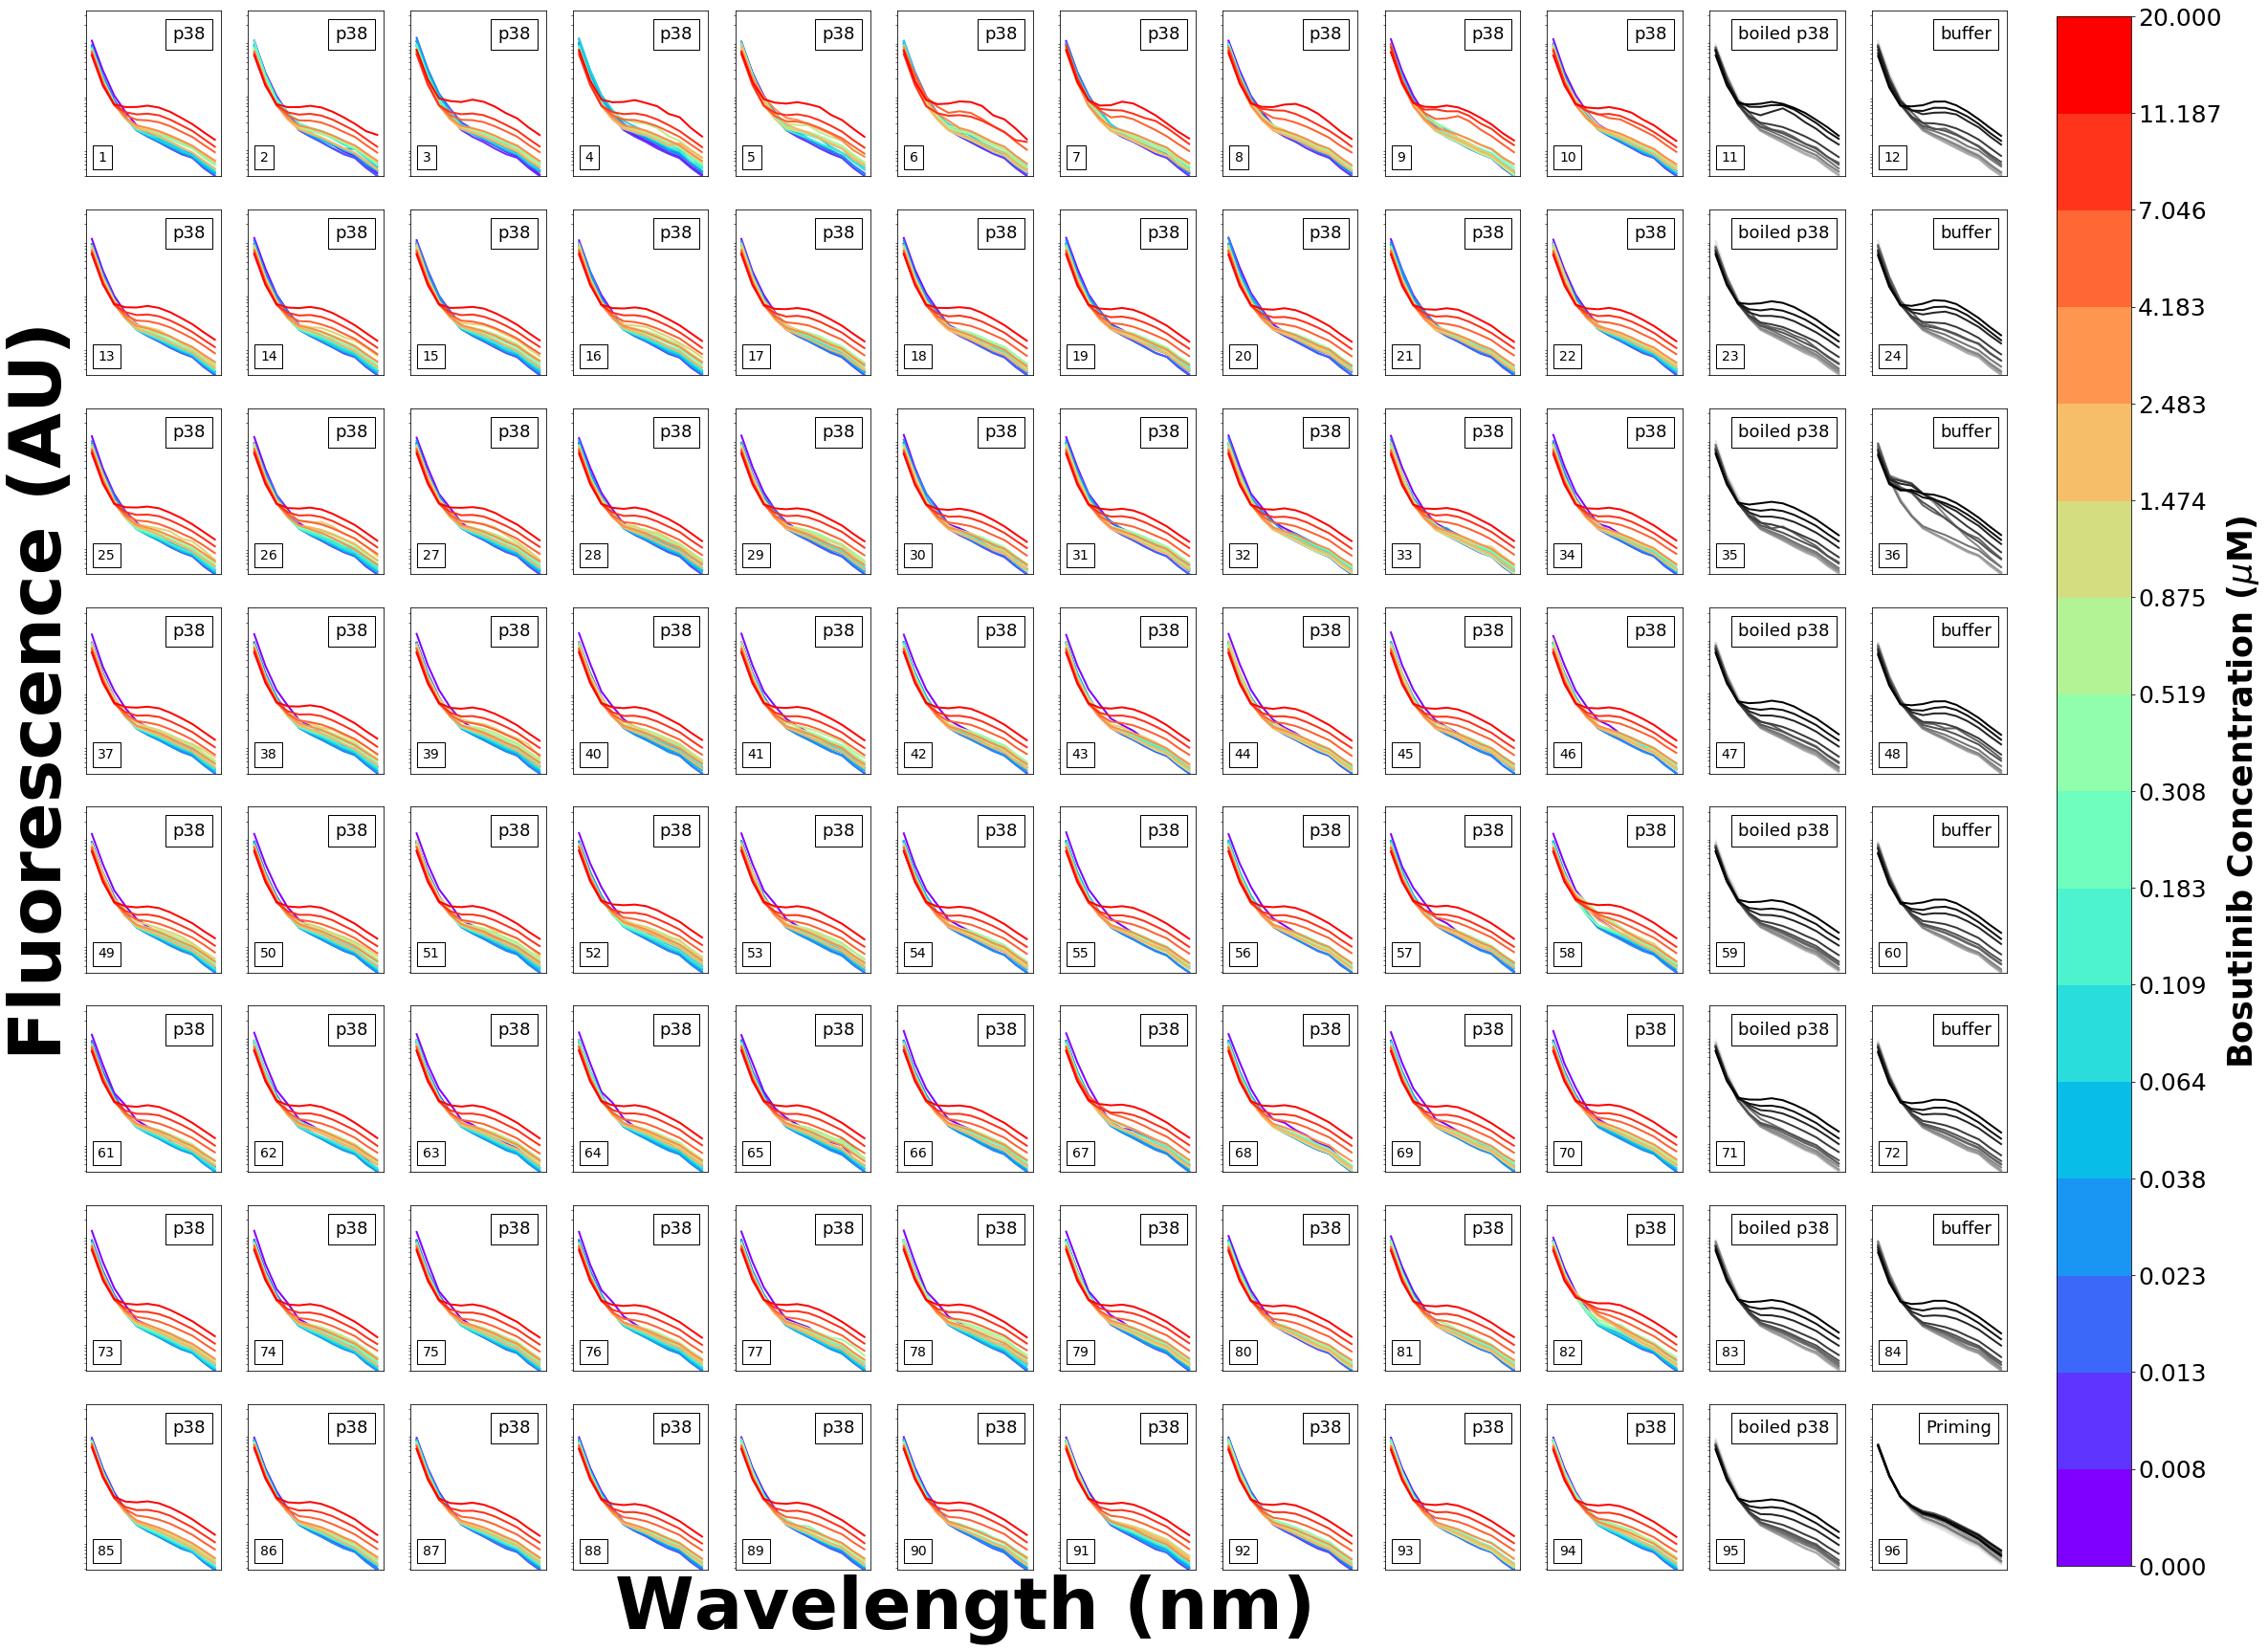

In [3]:

# In[19]:


nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 17], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        
# print(measurements) ##### gives 17 arrays of correct data, but which well? #####


# In[25]:

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[36,30])

label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'


ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
c = list(concentrations)


for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'Priming', 'boiled p38']:
                color=cm.Greys(np.linspace(0,1,17))
            else:
                color=cm.rainbow(np.linspace(0,1,17))
            for read, c in zip(data[row_index,col_index,:,5:], color):
                plt.semilogy(x_values[5:], read, c=c, linewidth=2);


            #if index == 36:
            #    plt.xticks(np.arange(int(x_values[20]), 600, 40),x_values[20::8], rotation=90, fontsize=18)
            
            plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, ymax)
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                plt.xlabel('Wavelength (nm)', fontsize=75, fontweight='bold')
            if index == 36:
                plt.ylabel('Fluorescence (AU)', fontsize=75, fontweight='bold')

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            
# Get rid of ticks on the last plot, which isn't being used

# ax = plt.subplot(nrows_fig,ncols_fig,index+1)
# fig.delaxes(ax)
# fig.subplots_adjust(wspace=0, hspace=0)
cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Bosutinib Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)

fig.savefig('bos_spectra_45_logy.pdf', bbox_inches='tight', dpi=300)




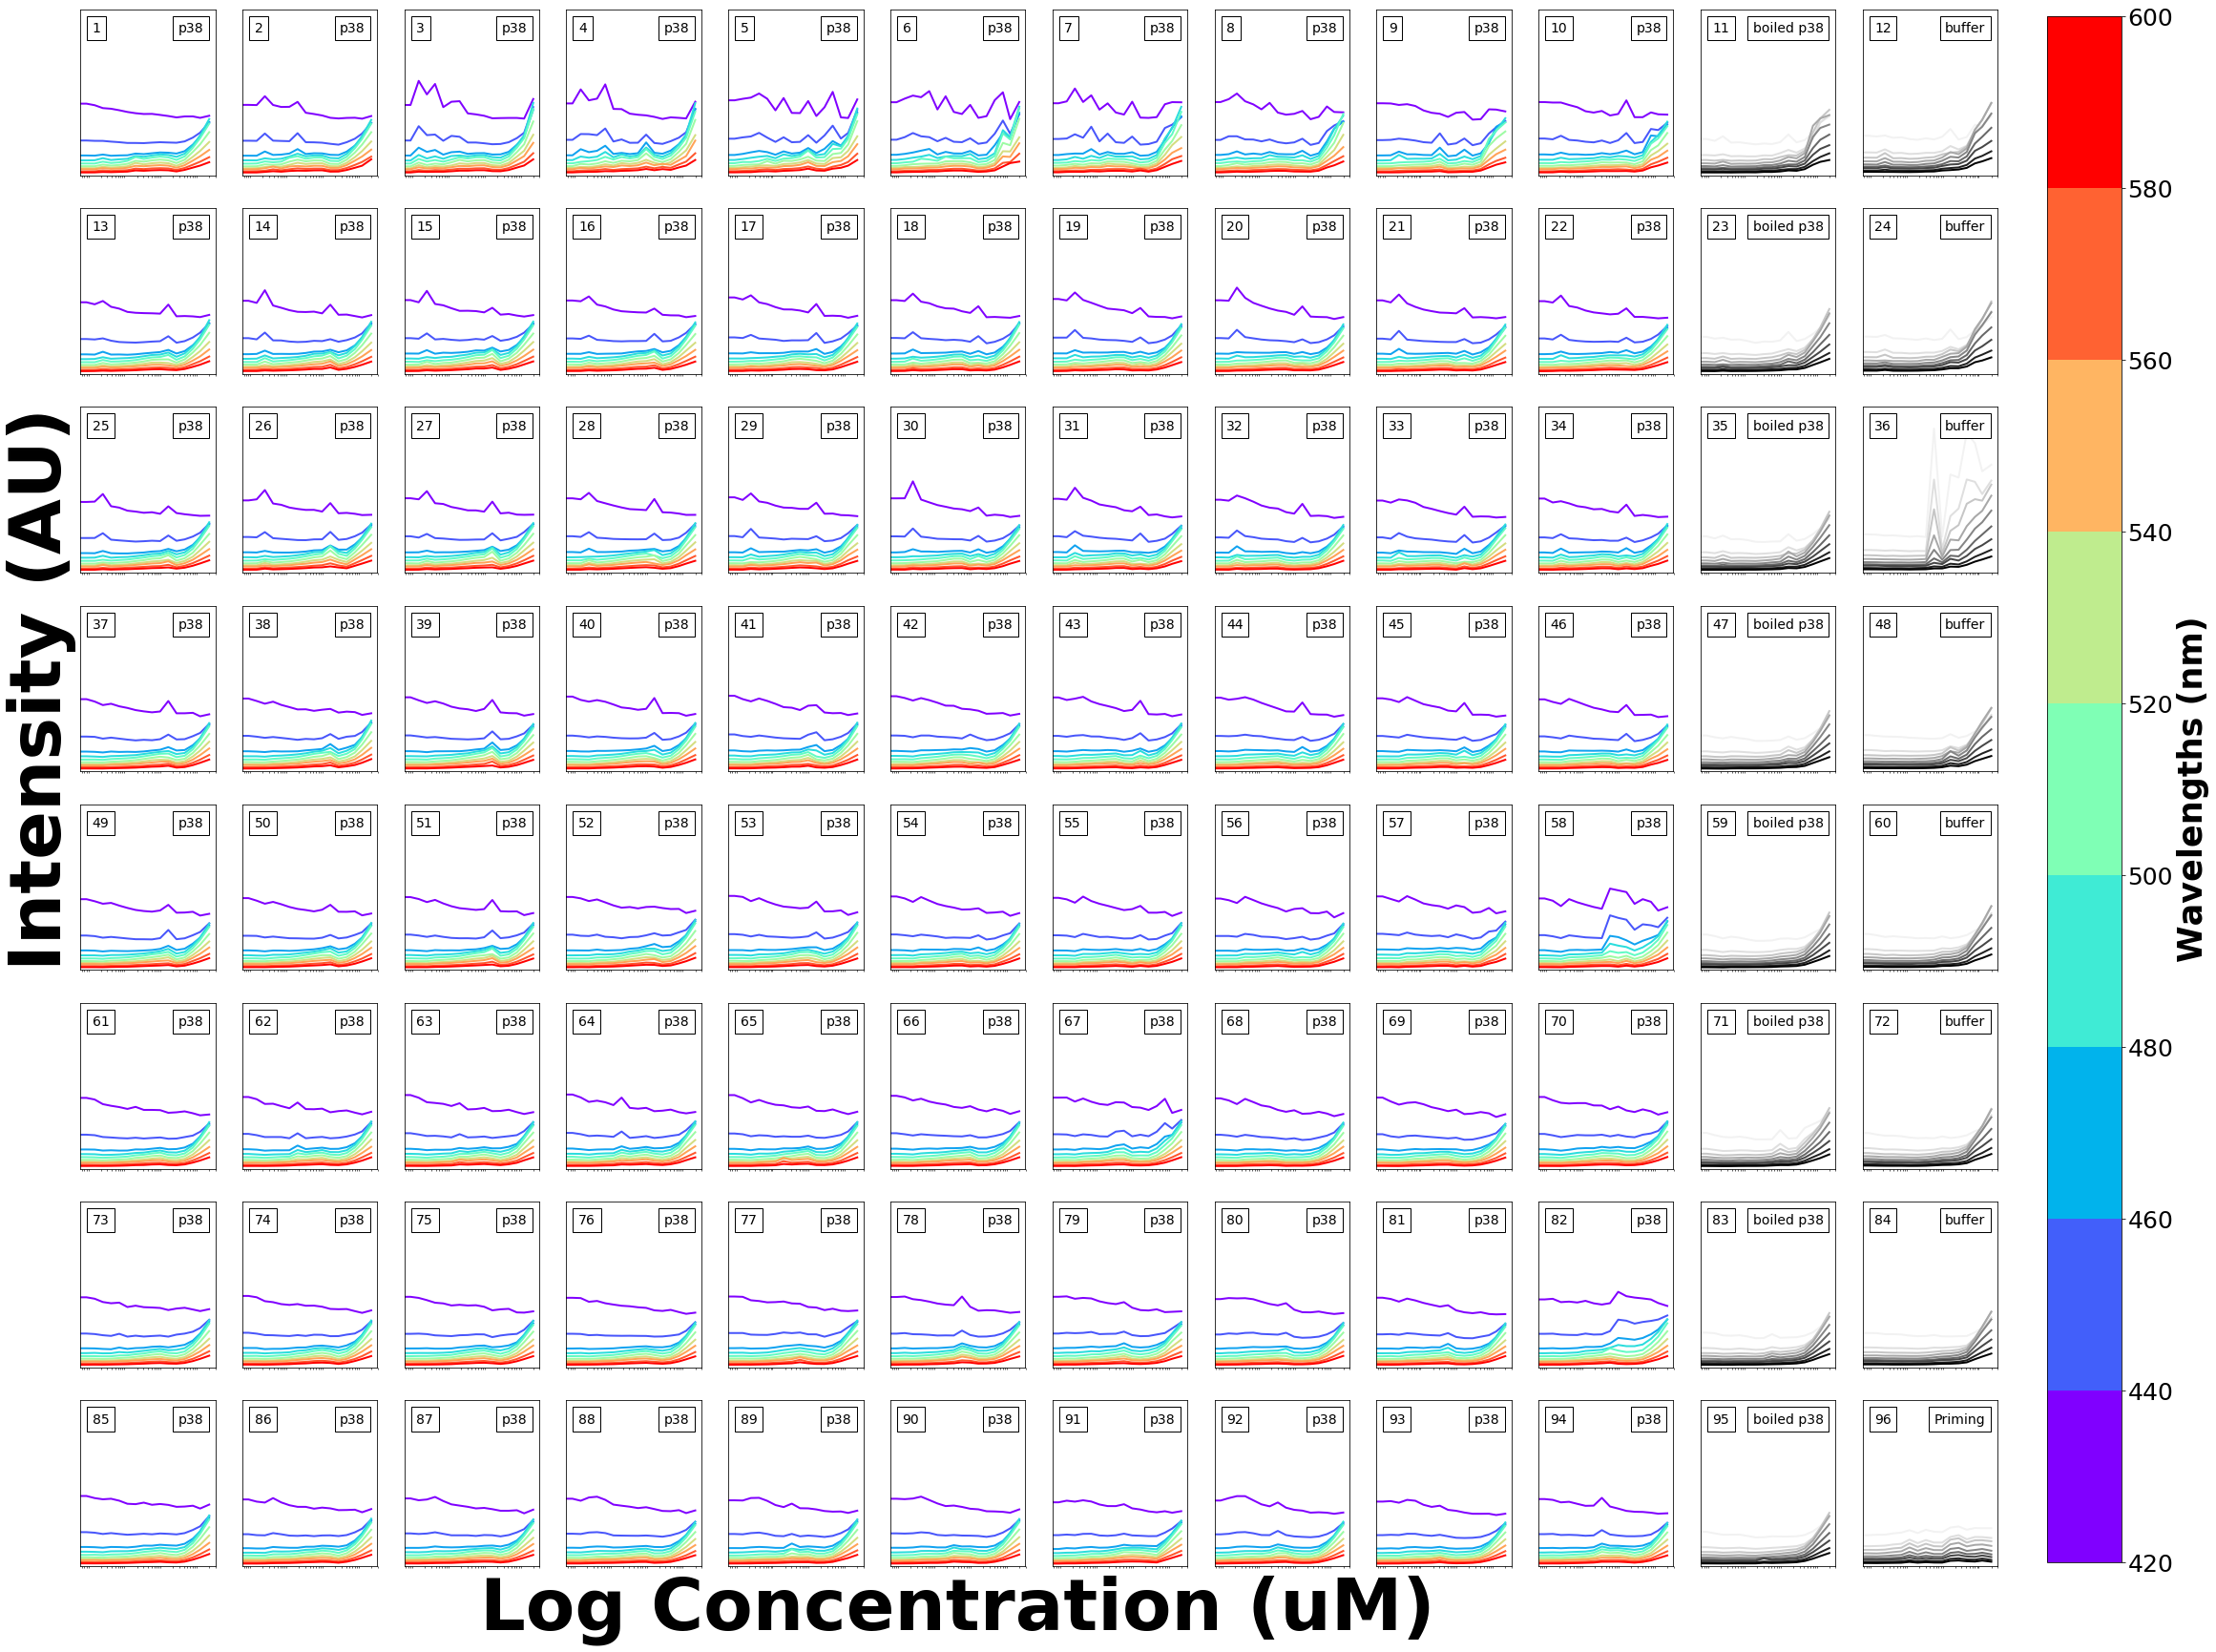

In [56]:
nrows = 8
ncols = 12
index = 0

wavelengths = np.array([280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600])

concentrations = np.array([ 0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06,   2.48263378e-06,
         4.18255821e-06,   7.04646547e-06,   1.118713651e-05,  2.0e-05])

nconcentrations = len(concentrations)

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 17], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(concentrations)
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        
        

# In[25]:

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[36,30])

label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'


ymax = data[:,:,:,7:].max().max().max()
xmax = max(x_values)
xmin = min(x_values)
wl = list(wavelengths)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
#             gray = cm.Greys(np.linspace(0,1,17))
            # plot control wells in grayscale and the rest in color
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'Priming', 'boiled p38']:
                color=cm.Greys(np.linspace(0,1,10))
            else:
                color=cm.rainbow(np.linspace(0,1,10))
                
            # skip the first 5 wavelengths which are 'OVER'    
            #for read, wl in zip(data[row_index,col_index,:,5:], color):
            c_index = 0
            for wavelength in range(7, len(wavelengths)):
                read = data[row_index,col_index,:, wavelength]
                plt.semilogx(x_values, read, c=color[c_index], linewidth=2);
                c_index += 1
            #if index == 36:
            #    plt.xticks(np.arange(int(x_values[20]), 600, 40),x_values[20::8], rotation=90, fontsize=18)
            
            plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, ymax)
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=14))
                ax.add_artist(anchored_text)
            if index == 89:
                plt.xlabel('Log Concentration (uM)', fontsize=75, fontweight='bold')
            if index == 36:
                plt.ylabel('Intensity (AU)', fontsize=75, fontweight='bold')

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=2, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            
# Get rid of ticks on the last plot, which isn't being used

# ax = plt.subplot(nrows_fig,ncols_fig,index+1)
# fig.delaxes(ax)
# fig.subplots_adjust(wspace=0, hspace=0)
cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

norm = matplotlib.colors.BoundaryNorm(wavelengths[7:], cm.rainbow.N)
wl_labels = ['{0:}'.format(x) for x in wavelengths[7:]]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=wavelengths[7:], boundaries=wavelengths[7:])
cb.set_label('Wavelengths (nm)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(wl_labels)

fig.savefig('bos_spectra_intensity_logconc.pdf', bbox_inches='tight', dpi=300)
